# Project 101
### PARTE 2.0 - Modelos Estadísticos Clásicos 


### Contenido
- [Introducción](#intro)
- [Data preparation](#dataprep)
- [Descomposicion de la serie](#desc)
- [Modelado](#modelos)

    - [**1. Modelos Estadísticos Clásicos**](#1)
        - [Dicky Fuller Test](#1.1)
        - [Autocorrelacion y Autocorrelacion Parcial](#1.2)
        - [SARIMAX model](#1.3)

    - [Resultados](#resultados)


De acuerdo con los resultados obtenidos en el EDA y la validación realizada con el equipo de ventas, importacion y exportacion, concluimos en los principales motivos que deben ser modelados. Como las condiciones economicas y politicas son tan cambiantes con el fin de adaptarse a las nuevas necesidades de los clientes, Raiconet con frecuencia lanza o relanza nuevos motivos realizando cambios en las rutas, agentes y proveedores. Por ello, en el plazo del analisis de los ultimos 5 años, muchos de los motivos ya no son utilizados. 

Los prinicipales motivos a predecir son: 

__Impo:__
-   528 USA FLAT
-   544 UPS MERCOSUR
-   571 Geobox Flat
-   597 EUROPA UPS
-   550 ORIENTE UPS
-   600 Courier Oriente Flat Wish
-   598 China Latin
 
__Expo:__
 - Exporta Simple (P.A.)
 - CARGA AEREA EXPO PREPAID
 - CARGA AEREA EXPO - Q (Servicios expo Quick)
 - 4-Expo - Fedex Economy	
 - 6-Expo-UPS Express

#### Referencias

https://medium.com/@krzysztofdrelczuk/acf-autocorrelation-function-simple-explanation-with-python-example-492484c32711

https://www.kaggle.com/code/iamleonie/time-series-interpreting-acf-and-pacf

https://bookdown.org/JakeEsprabens/431-Time-Series/modelling-time-series.html

https://towardsdatascience.com/machine-learning-part-19-time-series-and-autoregressive-integrated-moving-average-model-arima-c1005347b0d7

https://medium.com/@dave.cote.msc/rdr-score-metric-for-evaluating-time-series-forecasting-models-1c23f92f80e7#:~:text=Currently%2C%20the%20most%20popular%20metrics,are%20MAE%2C%20RMSE%20and%20AIC.&text=To%20briefly%20summarize%2C%20both%20MAE,impact%20of%20the%20large%20errors.

https://towardsdatascience.com/time-series-forecast-error-metrics-you-should-know-cc88b8c67f27

https://towardsdatascience.com/forecasting-with-machine-learning-models-95a6b6579090

https://pypi.org/project/mlforecast/

__Librerias a usar__

In [1]:
import pandas as pd
import funciones_utiles
from funciones_utiles import DataPrep, tests_pre_modelling, Metrics
import plotly_express as px
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns  
from statsmodels.graphics.tsaplots import  plot_acf, plot_pacf
import time
time.clock = time.time

import statsmodels.api as sm
from statsmodels.tsa.ar_model import AutoReg 
from statsmodels.tsa.arima_model import ARIMA, ARMA
from sklearn.metrics import mean_squared_error, mean_absolute_error

### Data Preparation <a id='dataprep'></a>

Vamos a agrupar las entradas por fecha para tener el volumen total de kilos por semana. Luego vamos a crear un df para cada motivo y entrenar los modelos.

In [2]:
df_guias_impo= pd.read_csv('Data/Guias Impo.csv')
df_guias_expo= pd.read_csv('Data/Guias Expo.csv')

Top 7 servicios de IMPO

In [3]:
df_impo_1= DataPrep().crear_dataset(df_guias_impo,'USA FLAT')
df_impo_1.to_csv('Data/Modelado/impo 1 - USA FLAT.csv', index=False)

df_impo_2= DataPrep().crear_dataset(df_guias_impo, 'ORIENTE UPS')
df_impo_2.to_csv('Data/Modelado/impo 2 - ORIENTE UPS.csv', index=False)

df_impo_3= DataPrep().crear_dataset(df_guias_impo, 'CHINA LATIN LOGISTIC  CO via UPS/FEDEX')
df_impo_3.to_csv('Data/Modelado/impo 3 - CHINA LATIN LOGISTIC.csv', index=False)

df_impo_4= DataPrep().crear_dataset(df_guias_impo, 'EUROPA UPS')
df_impo_4.to_csv('Data/Modelado/impo 4 - EUROPA UPS.csv', index=False)

df_impo_5= DataPrep().crear_dataset(df_guias_impo, 'Courier Oriente FLAT Wish/Latin logistic')
df_impo_5.to_csv('Data/Modelado/impo 5 - Courier Oriente FLAT Wish.csv', index=False)

df_impo_6= DataPrep().crear_dataset(df_guias_impo, 'Impo Geobox Flat ')
df_impo_6.to_csv('Data/Modelado/impo 6 - Impo Geobox Flat.csv', index=False)

df_impo_7= DataPrep().crear_dataset(df_guias_impo, 'UPS MERCOSUR')
df_impo_7.to_csv('Data/Modelado/impo 7 - UPS MERCOSUR.csv', index=False)

c:\Users\Bravo15\Desktop\raico\Proyecto final\Project_Raiconet_101\Experiments\funciones_utiles.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Guias_Fecha']= pd.to_datetime(df['Guias_Fecha'])


Top 5 servicios de EXPO

In [4]:
df_expo_1= DataPrep().crear_dataset(df_guias_expo, 'Exporta Simple - Puerta-Aeropuerto')
df_expo_1.to_csv('Data/Modelado/expo 1 - Exporta Simple - Puerta-Aeropuerto.csv', index=False)

df_expo_2= DataPrep().crear_dataset(df_guias_expo, 'CARGA AEREA EXPO PREPAID')
df_expo_2.to_csv('Data/Modelado/expo 2 - CARGA AEREA EXPO PREPAID.csv', index=False)

df_expo_3= DataPrep().crear_dataset(df_guias_expo, 'CARGA AEREA EXPO - Q')
df_expo_3.to_csv('Data/Modelado/expo 3 - CARGA AEREA EXPO - Q.csv', index=False)

df_expo_4= DataPrep().crear_dataset(df_guias_expo, '4-Expo - Fedex Economy')
df_expo_4.to_csv('Data/Modelado/expo 4 - 4-Expo - Fedex Economy.csv', index=False)

df_expo_5=DataPrep().crear_dataset(df_guias_expo, '6-Expo-UPS Express')
df_expo_5.to_csv('Data/Modelado/expo 5 - 6-Expo-UPS Express.csv', index=False)

De esta forma, obtenemos por cada motivo un dataframe con dos columnas: 'ds' la fecha que permite identificar la semana y 'y' el total de kilos transportados para esa semana. Tambien, crearemos un diccionario para poder identificar mas adelante a que sigla corresponde cada motivo, por cuestiones practicas fueron resumidos en el tipo de servicio y un numero.

In [5]:
df_impo_1.head()

,ds,y
0,2019-01-06,1950.0
1,2019-01-13,2402.0
2,2019-01-20,2782.0
3,2019-01-27,3263.0
4,2019-02-03,3843.0


Contrui un diccionario que permite mapear el nombre del dataframe designado con el nombre del motivo, para permitir un analisis mas prolijo y no perder referencia sobre el motivo sobre el que estare trabajando

In [6]:
lista_df= ['df_impo_1', 'df_impo_2', 'df_impo_3', 'df_impo_4', 'df_impo_5','df_impo_6', 'df_impo_7',
           'df_expo_1', 'df_expo_2', 'df_expo_3', 'df_expo_4', 'df_expo_5']
nombres_motivos= ['528 USA FLAT', '550 ORIENTE UPS','598 CHINA LATIN LOGISTIC', '597 EUROPA UPS', '600 Flat Wish', '571 Geobox Flat', 'UPS MERCOSUR', 
            'Exporta Simple', 'CARGA AEREA EXPO PREPAID', 'CARGA AEREA EXPO - Q', '4-Expo - Fedex Economy', '6-Expo-UPS Express']
dic_num_motivos= {lista_df[i]: nombres_motivos[i] for i in range(len(lista_df))}

### Descomposición de la serie <a id='desc'></a>

Para esta sección previo a comenzar a modelar utilizando metodos estadisticos clásicos estudiaré la composición de las series de tiempo para cada motivo, de que forma se autocorrelacionan, si existen patrones intrínsicos o factores externos que pueden influir en el posterior entrenamineto del modelo. 

##### Distribución Semanal por Motivo

Observando las distribuciones para cada motivo seleccionado, observamos como poseen cualidades y patrones muy diferentes entre si. Ademas algunos motivos son recientes por lo que no hay datos previos al 2022 como en el caso de Geobox Flat, o incluso hay otros motivos como por ejemplo 598 y 600 ambos de la sede de China que presentan semanas en donde el volumen es cero, estos estancamientos se deben en gran medida en que son motivos complementarios y deberian presentar patrones y comportamientos similares. 

Cada motivo posee su particularidad y esta expuesto a distintos eventos externos como pueden ser medidas que afecten directamente al servicio como medidas aduaneras para la exportacion o para la importacion, o incluso como representan rutas especificas sus variaciones pueden responder a la demanda de los clientes por estas rutas o las interrupciones que pueden haber en las mismas. 

Cada una de las series presentadas representan diversos factores que influyen en su comportamiento, para ello en esta seccion intentare descomponer y comprender que factores realmente inciden y si estos son comun para los motivos seleccionados. 

In [7]:
lista_dataframe= [df_impo_1, df_impo_2, df_impo_3, df_impo_4, df_impo_5,df_impo_6, df_impo_7,
           df_expo_1, df_expo_2, df_expo_3, df_expo_4, df_expo_5]

n= 0

for df in lista_dataframe: 
    
    a= lista_df[n]
    b= dic_num_motivos[a]
    
    fig = px.line(df, x='ds', y='y', title=f"Volumen de Kilos Semanal {a[3:]} <br><sup>{b}</sup>")

    fig.update_xaxes(
        rangeslider_visible=True,
        rangeselector=dict(
            buttons=list([
                dict(count=1, label="1m", step="month", stepmode="backward"),
                dict(count=6, label="6m", step="month", stepmode="backward"),
                dict(count=1, label="YTD", step="year", stepmode="todate"),
                dict(count=1, label="1y", step="year", stepmode="backward"),
                dict(step="all")
            ])
        )
        )
    
    n+=1
    
    fig.show()

#### Modelado: Métricas a utilizar

Antes de comenzar a evaluar y analizar posibles modelos, determinare las metricas con las cuales compararemos mas adelante las performance de cada modelo.

Las metricas de evaluacion elegidas para el forecasting son: 

- MAE (Mean Absolute Error): Permite una facil interpretacion ya que mide el error promedio en terminos absolutos, es decir nos permite comparar que tan bueno es el modelo en terminos de errores promedio en unidades absolutas de kilos. Ademas, a diferencia del RMSE no penaliza los outliers. 

- RMSE (Root Mean square error): mide los errores y penaliza a los errores que sean grandes, es el promedio de la diferencia cuadratica entre los valores reales y los valores predichos
    
- sMAPE: es una medida facil de interpretar ya que permite identificar en terminos de porcentaje que tan bueno es el modelo en predecir y que porcentaje de error posee. Aunque la media sea susceptible al efecto de valores atipicos aun asi es una buena metrica para comparar distintos tipos de modelos con el mismo set de datos. Ademas a diferencia del MAPE no es sensible a valores cercanos a cero, y como para las series existen valores cercanos a cero es preferible utilizar esta metrica. 

En la siguiente tabla se guardaron los resultados para cada modelo para cada serie, de esta forma en todos los notebooks de modelado se trabajara sobre el mismo lo que permitira comparar los resultados entre ellos. 

In [8]:
comparison_tbl = pd.DataFrame(columns = ['Serie',
                                        'Modelo',
                                        'MAE',
                                        'RMSE', 
                                        'sMAPE',
                                        'Processing Time'])

i_index=[]
i_index = -1

models = []

#### Modelos Estadísticos Clásicos

En esta seccion analizaré y compararé modelos estadísticos clasicos: AR, MA, ARMA y Arima. Por ello antes de comenzar a modelar aplicaremos los test correspondientes de autocorrelacion y autocorrelacion parcial para conocer las caracteristicas de las series y luego poder decidir que modelos estadisticos podrian ser aplicados. 
Como la autocorrelación supone que las series son estacionarias antes de comenzar a analizarlas debemos verificar que lo sean, para ello utilice el ADF (Augmented Dicky-Fuller Test), una vez obtenidas las series estacionarias aplicare los test ACF y PACF, luego para las series no estacionarias las transformare para convertirlas en estacionaria y poder aplicar los test. 

Mas adelante, una vez analizados los resultados, aplicare los modelos de acuerdo a los resultados obtenidos para cada serie. 

Por otro lado, aparte de encontrar patrones en las series los resultados de los test de autocorrelacion no solo aportaran para aplicar los modelos clasicos sino que tambien poseen un impacto practico en modelos de ML y Deep Learning ya que nos permiten tomar decisiones a la hora de modelar y tunear hiperparametros

##### ACF & PACF 

Como la autocorrelacion supone que las series son estacionarias antes de comenzar a analizarlas debemos verificar que lo sean, para ello utilice el ADF (Augmented Dicky-Fuller Test): 

(H0) La serie es no estacionaria



p- valor > 0.05: Con un 95% de confianza, no podemos rechazar la hipotesis nula, la data tiene una unica raiz por lo que no es estacionaria. 

p- valor <= 0.05: Con un 95% de confianza, rechazo la hipotesis nula, 
la data no tiene una unica raiz por lo que es estacionaria. 

Por ello, si la serie es estacionaria continuaremos con el modelado, en cambio para las series que no sean estacionarias intentare hacer la diferencia de la misma y volvere a chequear estacionalidad.

In [9]:
n=0
for df in lista_dataframe:
    a= lista_df[n]
    b= dic_num_motivos[a]
    print('.......................................', '\n',f'{a}', '\n', f'{b}', '\n')
    tests_pre_modelling.check_stationarity(df['y'])
    n+=1

....................................... 
 df_impo_1 
 528 USA FLAT 

ADF Statistic: -4.304913
p-value: 0.000436
Critical Values:
	1%: -3.462
	5%: -2.876
	10%: -2.574
Stationary
....................................... 
 df_impo_2 
 550 ORIENTE UPS 

ADF Statistic: -2.015910
p-value: 0.279641
Critical Values:
	1%: -3.463
	5%: -2.876
	10%: -2.574
Non-stationary
....................................... 
 df_impo_3 
 598 CHINA LATIN LOGISTIC 

ADF Statistic: -4.931840
p-value: 0.000030
Critical Values:
	1%: -3.463
	5%: -2.876
	10%: -2.574
Stationary
....................................... 
 df_impo_4 
 597 EUROPA UPS 

ADF Statistic: -1.847862
p-value: 0.356971
Critical Values:
	1%: -3.463
	5%: -2.876
	10%: -2.574
Non-stationary
....................................... 
 df_impo_5 
 600 Flat Wish 

ADF Statistic: -2.697520
p-value: 0.074468
Critical Values:
	1%: -3.463
	5%: -2.876
	10%: -2.574
Non-stationary
....................................... 
 df_impo_6 
 571 Geobox Flat 

ADF Statistic

Los resultados obtenidos nos indican que con un nivel de confianza al 95% podemos rechazar o no rechazar la hipotesis nula de que la serie es estacionaria. Por ello los resultados obtenidos resaltaran en verde a las que no se puede rechazar la hipotesis nula (son estacionarias) y en rojo a las que no son estacionarias por lo que se rechaza la hipotesis nula.

De esta forma obtenemos que las series que son estacionarias son: 
    
    - Impo 1
    - Impo 3
    - Impo 7
    - Expo 2
    - Expo 4

Por eso a estos motivos cuyas series son estacionarias podremos realizar el analisis de Autocorrelacion (ACF) y Autocorrelacion Parcial (PACF)

#### Series Estacionarias

**Autocorrelacion (ACF) y Autocorrelacion Parcial (PACF)**

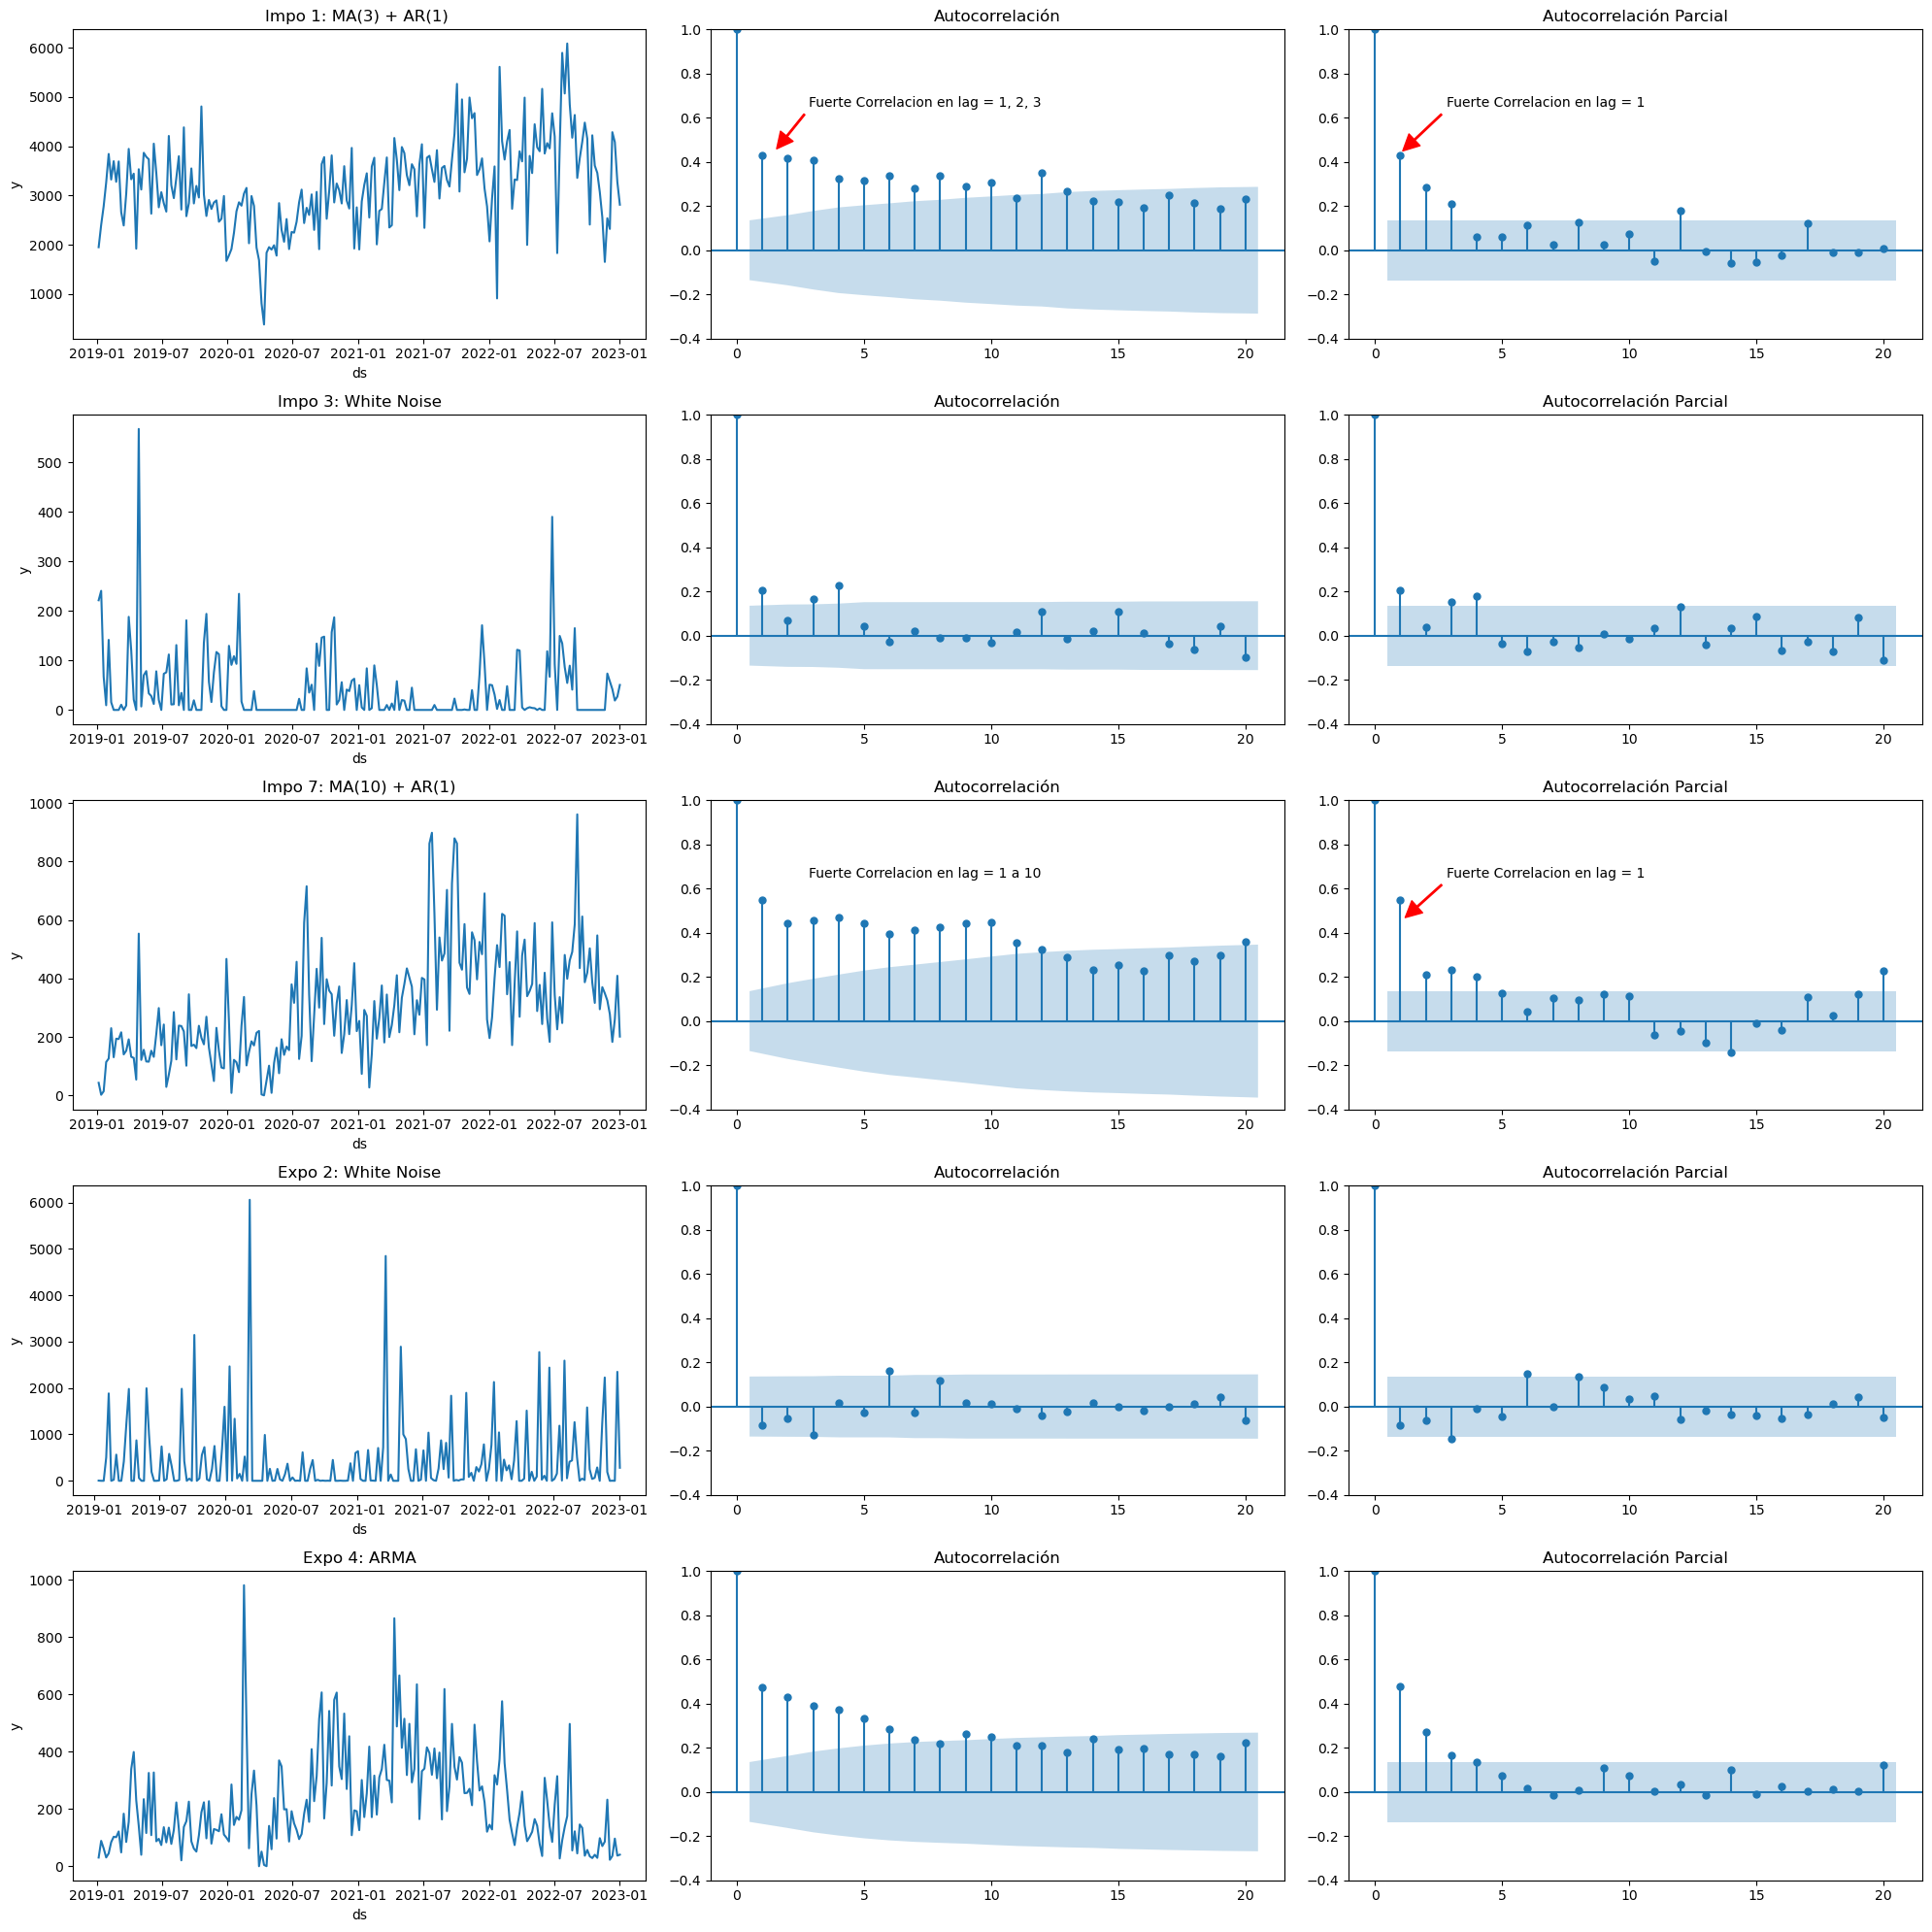

In [10]:
width = 20
height = 10
lag_acf = 20
lag_pacf = 20

# Crear la figura
f, ax = plt.subplots(nrows=5, ncols=3, figsize=(width, 2 * height))

##### Impo 1

# Graficar la serie de tiempo
sns.lineplot(x=df_impo_1['ds'], y=df_impo_1['y'], ax=ax[0, 0])
ax[0, 0].set_title('Impo 1: MA(3) + AR(1) ')

# Graficar ACF
plot_acf(df_impo_1['y'], lags=lag_acf, ax=ax[0, 1])
ax[0, 1].set_ylim(-0.4, 1)
ax[0, 1].set_title('Autocorrelación')
ax[0, 1].annotate('Fuerte Correlacion en lag = 1, 2, 3', xy=(1.5, 0.45), xycoords='data',
               xytext=(0.17, 0.75), textcoords='axes fraction',
               arrowprops=dict(color='red', shrink=0.05, width=1))

# Graficar PACF 
plot_pacf(df_impo_1['y'], lags=lag_pacf, ax=ax[0, 2], method='ols')
ax[0, 2].set_ylim(-0.4, 1)
ax[0, 2].set_title('Autocorrelación Parcial')
ax[0, 2].annotate('Fuerte Correlacion en lag = 1', xy=(1, 0.44), xycoords='data',
               xytext=(0.17, 0.75), textcoords='axes fraction',
               arrowprops=dict(color='red', shrink=0.05, width=1))

##### Impo 3

# Graficar la serie de tiempo para Impo 3
sns.lineplot(x=df_impo_3['ds'], y=df_impo_3['y'], ax=ax[1, 0])
ax[1, 0].set_title('Impo 3: White Noise')  # Ajusta el título según corresponda

# Graficar ACF para Impo 3
plot_acf(df_impo_3['y'], lags=lag_acf, ax=ax[1, 1])
ax[1, 1].set_ylim(-0.4, 1)
ax[1, 1].set_title('Autocorrelación')

# Graficar PACF para Impo 3
plot_pacf(df_impo_3['y'], lags=lag_pacf, ax=ax[1, 2], method='ols')
ax[1, 2].set_ylim(-0.4, 1)
ax[1, 2].set_title('Autocorrelación Parcial')

##### Impo 7

# Graficar la serie de tiempo para Impo 7
sns.lineplot(x=df_impo_7['ds'], y=df_impo_7['y'], ax=ax[2, 0])
ax[2, 0].set_title('Impo 7: MA(10) + AR(1)')  # Ajusta el título según corresponda

# Graficar ACF para Impo 7
plot_acf(df_impo_7['y'], lags=lag_acf, ax=ax[2, 1])
ax[2, 1].set_ylim(-0.4, 1)
ax[2, 1].set_title('Autocorrelación')
ax[2, 1].annotate('Fuerte Correlacion en lag = 1 a 10', xy=(1.1, 0.46), xycoords='data',
               xytext=(0.17, 0.75), textcoords='axes fraction')

# Graficar PACF para Impo 7
plot_pacf(df_impo_7['y'], lags=lag_pacf, ax=ax[2, 2], method='ols')
ax[2, 2].set_ylim(-0.4, 1)
ax[2, 2].set_title('Autocorrelación Parcial')
ax[2, 2].annotate('Fuerte Correlacion en lag = 1', xy=(1.1, 0.46), xycoords='data',
               xytext=(0.17, 0.75), textcoords='axes fraction',
               arrowprops=dict(color='red', shrink=0.05, width=1))

##### Expo 2

# Graficar la serie de tiempo para Expo 2
sns.lineplot(x=df_expo_2['ds'], y=df_expo_2['y'], ax=ax[3, 0])
ax[3, 0].set_title('Expo 2: White Noise')  

# Graficar ACF para Expo 2
plot_acf(df_expo_2['y'], lags=lag_acf, ax=ax[3, 1])
ax[3, 1].set_ylim(-0.4, 1)
ax[3, 1].set_title('Autocorrelación')

# Graficar PACF para Expo 2
plot_pacf(df_expo_2['y'], lags=lag_pacf, ax=ax[3, 2], method='ols')
ax[3, 2].set_ylim(-0.4, 1)
ax[3, 2].set_title('Autocorrelación Parcial')

##### Expo 4

# Graficar la serie de tiempo para Expo 4
sns.lineplot(x=df_expo_4['ds'], y=df_expo_4['y'], ax=ax[4, 0])
ax[4, 0].set_title('Expo 4: ARMA')  # Ajusta el título según corresponda

# Graficar ACF para Expo 4
plot_acf(df_expo_4['y'], lags=lag_acf, ax=ax[4, 1])
ax[4, 1].set_ylim(-0.4, 1)
ax[4, 1].set_title('Autocorrelación')

# Graficar PACF para Expo 4
plot_pacf(df_expo_4['y'], lags=lag_pacf, ax=ax[4, 2], method='ols')
ax[4, 2].set_ylim(-0.4, 1)
ax[4, 2].set_title('Autocorrelación Parcial')

# Ajustar el diseño y mostrar la figura
plt.tight_layout()
plt.show()

De acuerdo a los resultados obtenidos para los test de autocorrelacion, y autocorrelacion parcial, podemos definir que tipo de modelo podria utilizarse para cada serie tal como se especifica en los titulos de las serie en los plot. 

Sin embargo, tambien se observa que hay dos series que poseen ruido blanco: impo 3 y expo 2, para estas series mas adelante probaremos aplicar modelos AR, MA, ARMA y ARIMA pero con el fin de comparar resultados ya que de acuerdo a los resultados la serie no es compatible con este tipo de modelos.

A modo de resumen los resultados obtenidos fueron: 

- Impo 1: MA(3), o bien AR(1). 

        Por poseer una fuerte correlacion en los lags 1, 2 y 3 para el test ACF, y por presentar una fuerte correlacion en el lag 1 para el test PACF.


- Impo 3: Ruido Blanco.

        No se presentan correlaciones significativas al 95% de confianza para ninguno de los test. Por lo tanto la serie no presenta autocorrelaciones. 

- Impo 7: MA(10), o bien AR(1). 

        Presenta una fuerte correlacion del lag 1 al 10 siendo en todos los casos mayor a 0.4 en el test ACF, y ademas presenta una fuerte correlacion en el lag 1 para el test PACF.

- Expo 2: Ruido Blanco

        No se presentan correlaciones significativas al 95% de confianza para ninguno de los test. Por lo tanto la serie no presenta autocorrelaciones. 

- Expo 4: ARMA 

        Ya que ambos resultados de los test ACF y PACF presentan una distribucion exponencial, por lo que un modelo ARMA seria el apropiado. 

#### Series No Estacionarias

**Autocorrelacion (ACF) y Autocorrelacion Parcial (PACF)**

Para el caso de las series no estacionarias antes de correr el test de autocorrelacion debemos quitar la tendencia creciente o decreciente para convertirlas en series estacionarias. Luego aplicaremos como hicimos en la seccion anterior los test ACF y PACF a las nuevas series sin tendencia.

In [11]:
df_impo_2= tests_pre_modelling.crear_diff(df_impo_2)
df_impo_4= tests_pre_modelling.crear_diff(df_impo_4)
df_impo_5= tests_pre_modelling.crear_diff(df_impo_5)
df_impo_6= tests_pre_modelling.crear_diff(df_impo_6)
df_expo_1= tests_pre_modelling.crear_diff(df_expo_1)
df_expo_3= tests_pre_modelling.crear_diff(df_expo_3)

ADF Statistic: -12.890491
p-value: 0.000000
Critical Values:
	1%: -3.463
	5%: -2.876
	10%: -2.574
Stationary
None
ADF Statistic: -9.735220
p-value: 0.000000
Critical Values:
	1%: -3.463
	5%: -2.876
	10%: -2.574
Stationary
None
ADF Statistic: -10.877838
p-value: 0.000000
Critical Values:
	1%: -3.463
	5%: -2.876
	10%: -2.574
Stationary
None
ADF Statistic: -12.447145
p-value: 0.000000
Critical Values:
	1%: -3.633
	5%: -2.949
	10%: -2.613
Stationary
None
ADF Statistic: -6.603343
p-value: 0.000000
Critical Values:
	1%: -3.464
	5%: -2.876
	10%: -2.575
Stationary
None
ADF Statistic: -18.818721
p-value: 0.000000
Critical Values:
	1%: -3.463
	5%: -2.876
	10%: -2.574
Stationary
None


Tal como se observa en las gráficas debajo, obtenemos un nuevo conjunto de series que nos permite analizar autocorrelaciones y autocorrelaciones parciales para motivos con series no estacionarias. Como se observa, la serie azul corresponde a la serie con tendencia y la linea naranja a la nueva serie obtenida. A partir de esta realizare los test ACF y PACF.

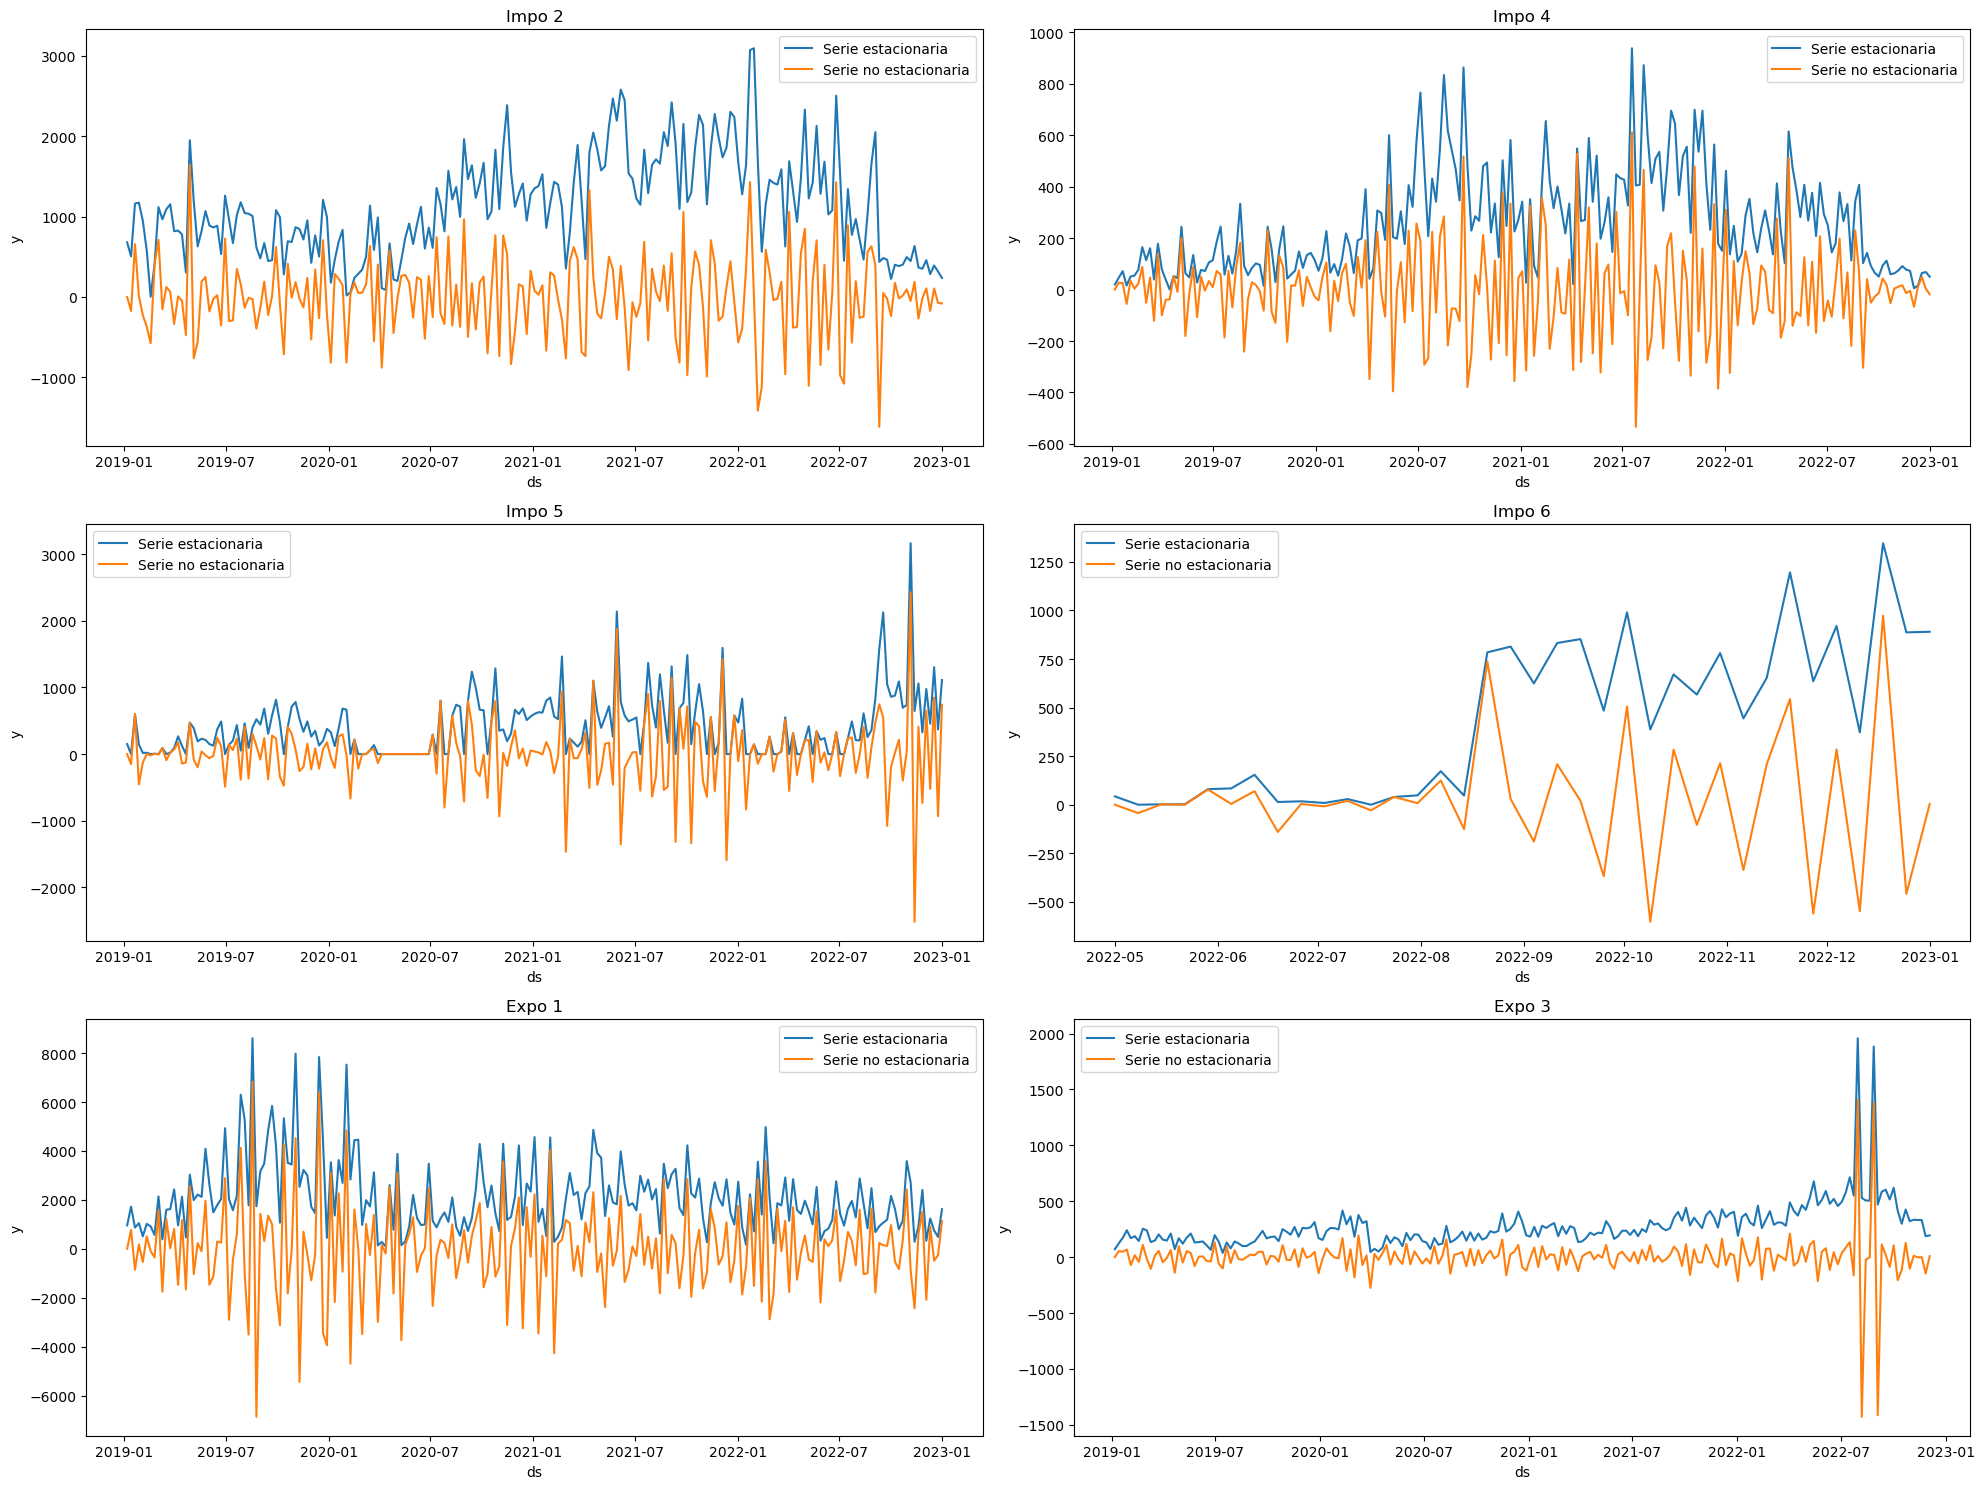

In [12]:
f, axes = plt.subplots(nrows=3, ncols=2, figsize=(20, 15))

datasets = [
    (df_impo_2, 'Impo 2'), (df_impo_4, 'Impo 4'),
    (df_impo_5, 'Impo 5'), (df_impo_6, 'Impo 6'),
    (df_expo_1, 'Expo 1'), (df_expo_3, 'Expo 3')
]

for i, (data, title) in enumerate(datasets):
    row = i // 2
    col = i % 2
    
    ax = axes[row, col]
    
    sns.lineplot(data=data, x='ds', y='y', ax=ax, label='Serie estacionaria')
    sns.lineplot(data=data, x='ds', y='y_diff', ax=ax, label='Serie no estacionaria')
    
    ax.set_title(f'{title}')
    ax.legend() 

plt.tight_layout()


plt.show()

#### Test ACF y PACF para series no estacionarias

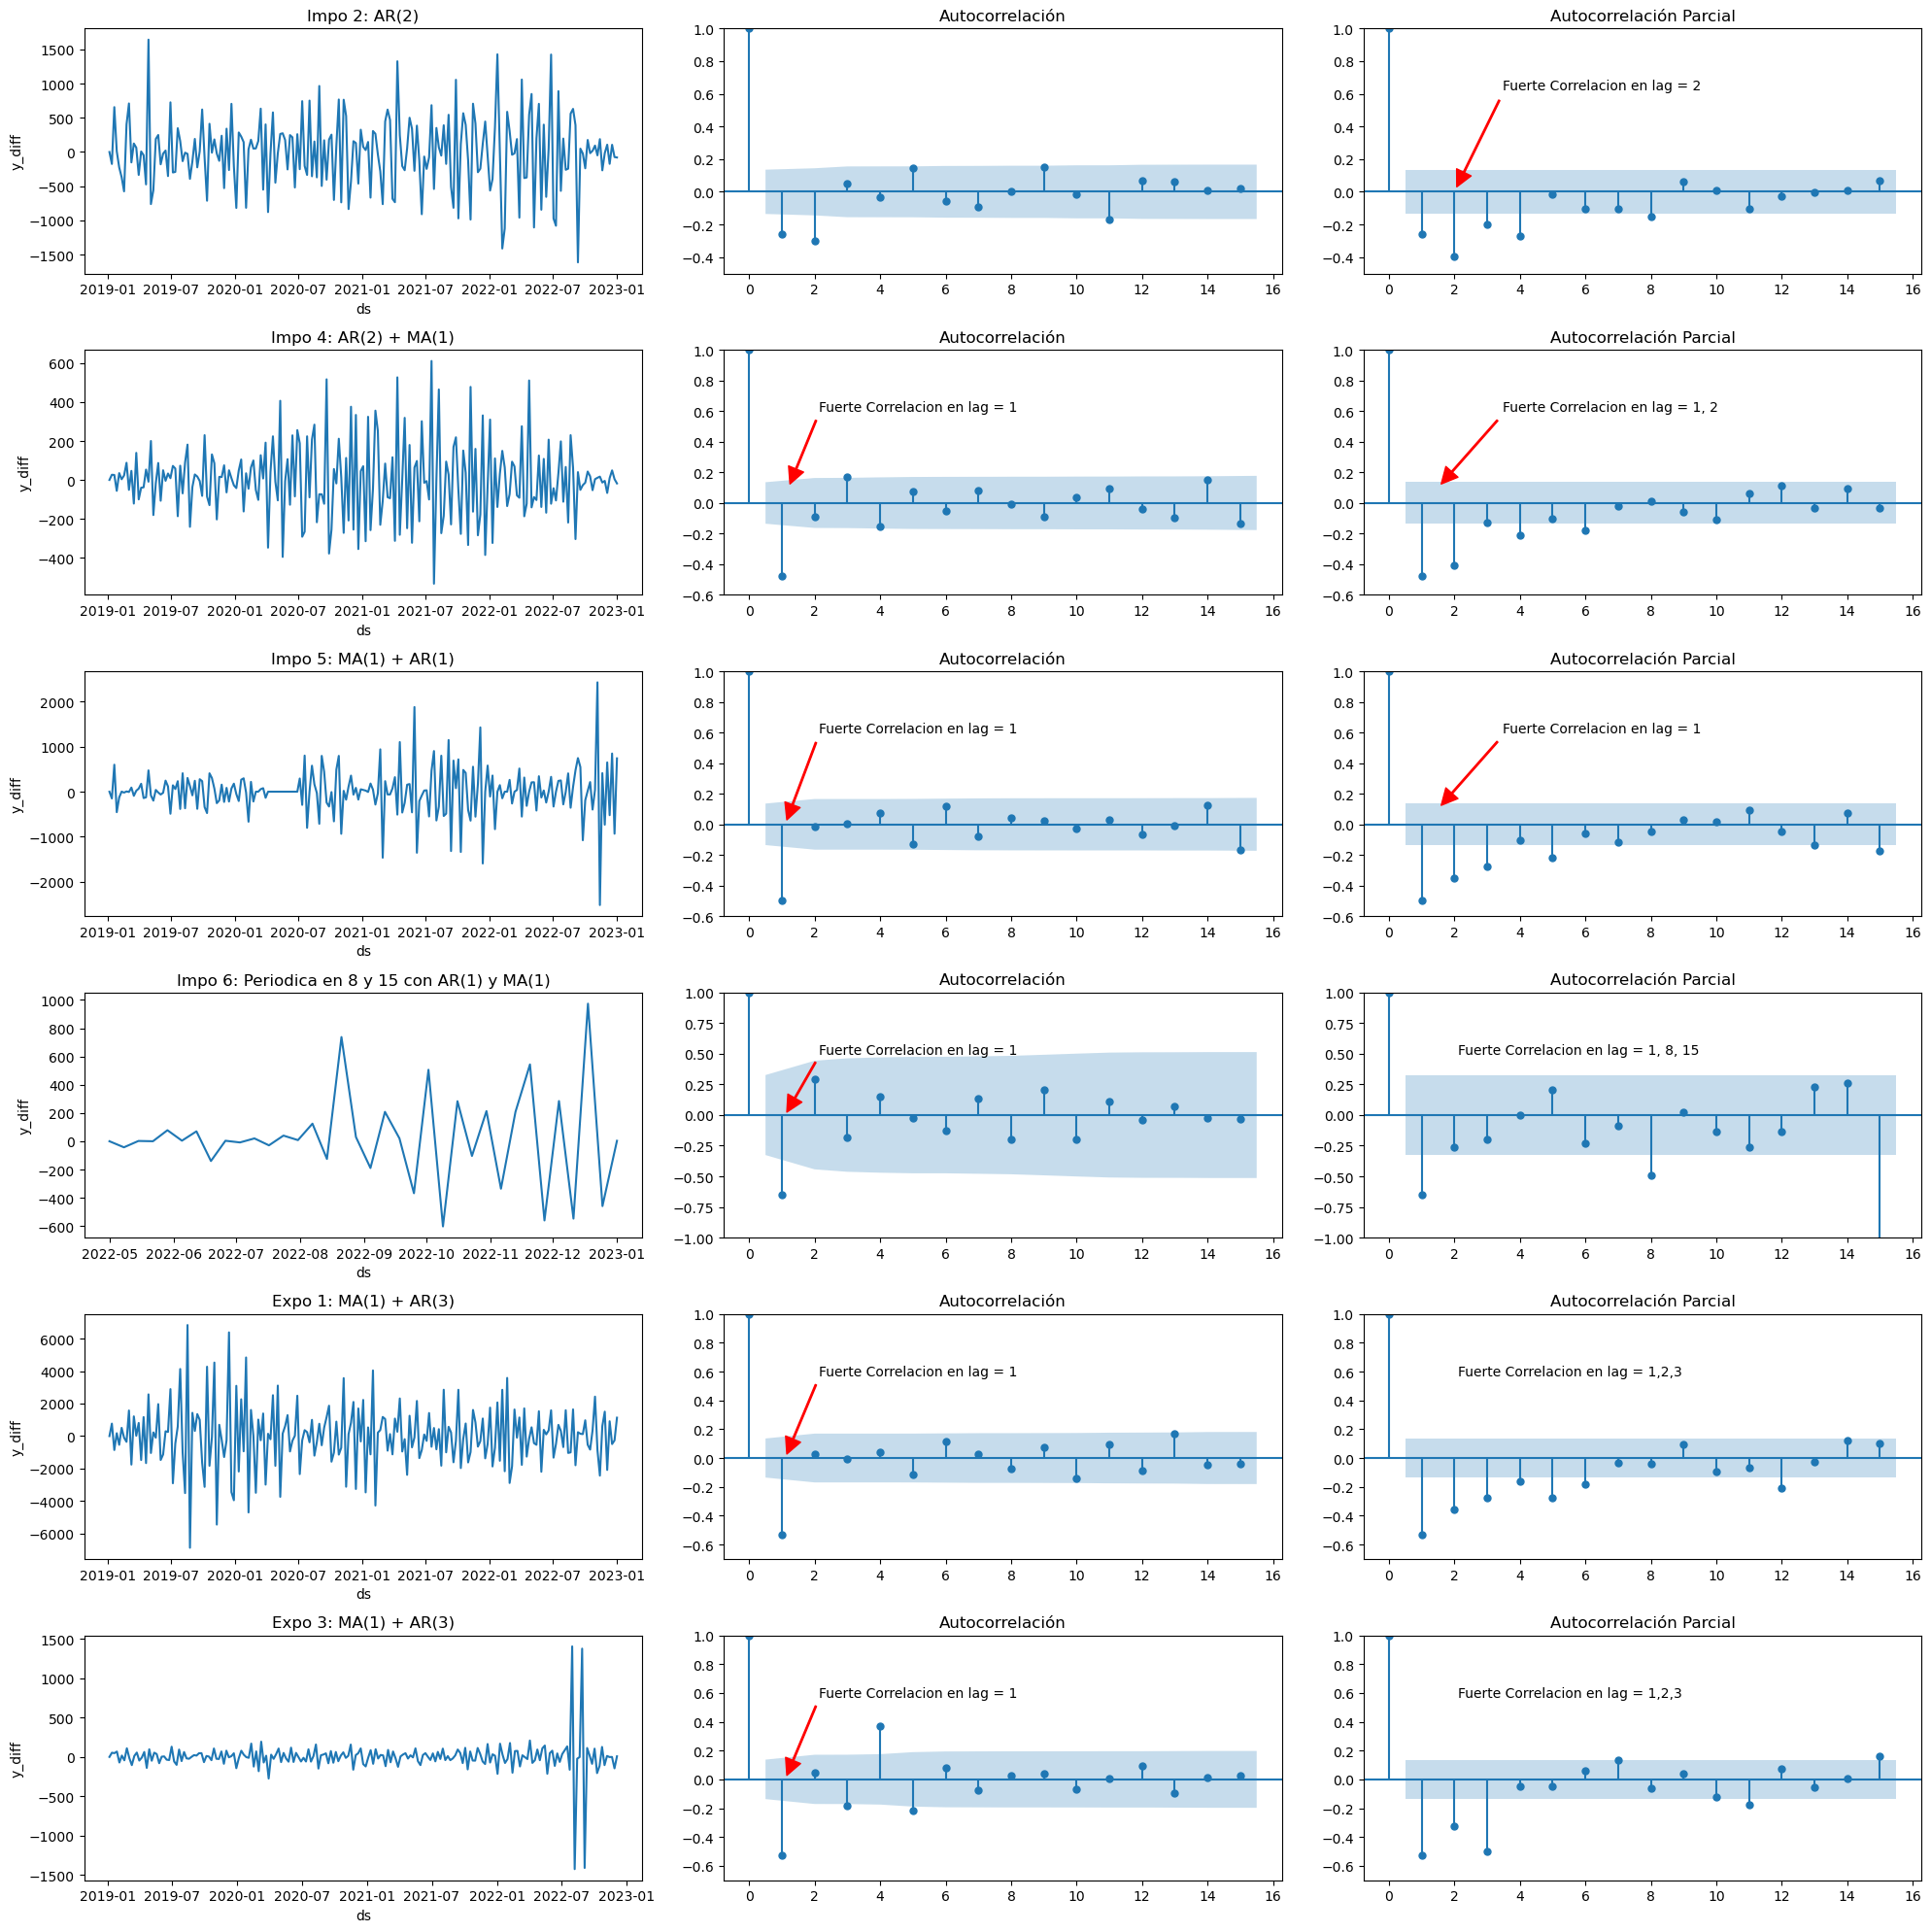

In [13]:
width = 20
height = 10
lag_acf = 15
lag_pacf = 15

f, ax = plt.subplots(nrows=6, ncols=3, figsize=(width, 2 * height))

##### Impo 2

# Graficar la serie de tiempo
sns.lineplot(x=df_impo_2['ds'], y=df_impo_2['y_diff'], ax=ax[0, 0])
ax[0, 0].set_title('Impo 2: AR(2)')

# Graficar ACF
plot_acf(df_impo_2['y_diff'], lags=lag_acf, ax=ax[0, 1])
ax[0, 1].set_ylim(-0.5, 1)
ax[0, 1].set_title('Autocorrelación')

# Graficar PACF 
plot_pacf(df_impo_2['y_diff'], lags=lag_pacf, ax=ax[0, 2], method='ols')
ax[0, 2].set_ylim(-0.5, 1)
ax[0, 2].set_title('Autocorrelación Parcial')
ax[0, 2].annotate('Fuerte Correlacion en lag = 2', xy=(2,- 0), xycoords='data',
               xytext=(0.25,0.75), textcoords='axes fraction',
               arrowprops=dict(color='red', shrink=0.05, width=1))

##### Impo 4

# Graficar la serie de tiempo para Impo 3
sns.lineplot(x=df_impo_4['ds'], y=df_impo_4['y_diff'], ax=ax[1, 0])
ax[1, 0].set_title('Impo 4: AR(2) + MA(1)')  # Ajusta el título según corresponda

# Graficar ACF para Impo 4
plot_acf(df_impo_4['y_diff'], lags=lag_acf, ax=ax[1, 1])
ax[1, 1].set_ylim(-0.6, 1)
ax[1, 1].set_title('Autocorrelación')
ax[1, 1].annotate('Fuerte Correlacion en lag = 1', xy=(1.2, 0.1), xycoords='data',
               xytext=(0.17, 0.75), textcoords='axes fraction',
               arrowprops=dict(color='red', shrink=0.05, width=1))

# Graficar PACF para Impo 4
plot_pacf(df_impo_4['y_diff'], lags=lag_pacf, ax=ax[1, 2], method='ols')
ax[1, 2].set_ylim(-0.6, 1)
ax[1, 2].set_title('Autocorrelación Parcial')
ax[1, 2].annotate('Fuerte Correlacion en lag = 1, 2', xy=(1.5,0.1), xycoords='data',
               xytext=(0.25,0.75), textcoords='axes fraction',
               arrowprops=dict(color='red', shrink=0.05, width=1))

##### Impo 5

# Graficar la serie de tiempo para Impo 5
sns.lineplot(x=df_impo_5['ds'], y=df_impo_5['y_diff'], ax=ax[2, 0])
ax[2, 0].set_title('Impo 5: MA(1) + AR(1)')  # Ajusta el título según corresponda

# Graficar ACF para Impo 5
plot_acf(df_impo_5['y_diff'], lags=lag_acf, ax=ax[2, 1])
ax[2, 1].set_ylim(-0.6, 1)
ax[2, 1].set_title('Autocorrelación')
ax[2, 1].annotate('Fuerte Correlacion en lag = 1', xy=(1.1, 0), xycoords='data',
               xytext=(0.17, 0.75), textcoords='axes fraction', 
               arrowprops=dict(color='red', shrink=0.05, width=1))

# Graficar PACF para Impo 5
plot_pacf(df_impo_5['y_diff'], lags=lag_pacf, ax=ax[2, 2], method='ols')
ax[2, 2].set_ylim(-0.6, 1)
ax[2, 2].set_title('Autocorrelación Parcial')
ax[2, 2].annotate('Fuerte Correlacion en lag = 1', xy=(1.5,0.1), xycoords='data',
               xytext=(0.25,0.75), textcoords='axes fraction',
               arrowprops=dict(color='red', shrink=0.05, width=1))


##### Impo 6

# Graficar la serie de tiempo para Impo 6
sns.lineplot(x=df_impo_6['ds'], y=df_impo_6['y_diff'], ax=ax[3, 0])
ax[3, 0].set_title('Impo 6: Periodica en 8 y 15 con AR(1) y MA(1)')  

# Graficar ACF para Impo 6
plot_acf(df_impo_6['y_diff'], lags=lag_acf, ax=ax[3, 1])

ax[3, 1].set_title('Autocorrelación')
ax[3, 1].annotate('Fuerte Correlacion en lag = 1', xy=(1.1, 0), xycoords='data',
               xytext=(0.17, 0.75), textcoords='axes fraction', 
               arrowprops=dict(color='red', shrink=0.05, width=1))

# Graficar PACF para Impo 6
plot_pacf(df_impo_6['y_diff'], lags=lag_pacf, ax=ax[3, 2], method='ols')

ax[3, 2].set_title('Autocorrelación Parcial')
ax[3, 2].annotate('Fuerte Correlacion en lag = 1, 8, 15', xy=(1.1, 0), xycoords='data',
               xytext=(0.17, 0.75), textcoords='axes fraction')


##### Expo 1

# Graficar la serie de tiempo para Expo 1
sns.lineplot(x=df_expo_1['ds'], y=df_expo_1['y_diff'], ax=ax[4, 0])
ax[4, 0].set_title('Expo 1: MA(1) + AR(3)')  

# Graficar ACF para Expo 1
plot_acf(df_expo_1['y_diff'], lags=lag_acf, ax=ax[4, 1])
ax[4, 1].set_ylim(-0.7, 1)
ax[4, 1].set_title('Autocorrelación')
ax[4, 1].annotate('Fuerte Correlacion en lag = 1', xy=(1.1, 0), xycoords='data',
               xytext=(0.17, 0.75), textcoords='axes fraction', 
               arrowprops=dict(color='red', shrink=0.05, width=1))

# Graficar PACF para Expo 1
plot_pacf(df_expo_1['y_diff'], lags=lag_pacf, ax=ax[4, 2], method='ols')
ax[4, 2].set_ylim(-0.7, 1)
ax[4, 2].set_title('Autocorrelación Parcial')
ax[4, 2].annotate('Fuerte Correlacion en lag = 1,2,3', xy=(1.1, 0), xycoords='data',
               xytext=(0.17, 0.75), textcoords='axes fraction')

##### Expo 3

# Graficar la serie de tiempo para Expo 3
sns.lineplot(x=df_expo_3['ds'], y=df_expo_3['y_diff'], ax=ax[5, 0])
ax[5, 0].set_title('Expo 3: MA(1) + AR(3)')  

# Graficar ACF para Expo 3
plot_acf(df_expo_3['y_diff'], lags=lag_acf, ax=ax[5, 1])
ax[5, 1].set_ylim(-0.7, 1)
ax[5, 1].set_title('Autocorrelación')
ax[5, 1].annotate('Fuerte Correlacion en lag = 1', xy=(1.1, 0), xycoords='data',
               xytext=(0.17, 0.75), textcoords='axes fraction', 
               arrowprops=dict(color='red', shrink=0.05, width=1))

# Graficar PACF para Expo 3
plot_pacf(df_expo_3['y_diff'], lags=lag_pacf, ax=ax[5, 2], method='ols')
ax[5, 2].set_ylim(-0.7, 1)
ax[5, 2].set_title('Autocorrelación Parcial')
ax[5, 2].annotate('Fuerte Correlacion en lag = 1,2,3', xy=(1.1, 0), xycoords='data',
               xytext=(0.17, 0.75), textcoords='axes fraction')

# Ajustar el diseño y mostrar la figura
plt.tight_layout()
plt.show()

De acuerdo a los resultados obtenidos para los test de autocorrelacion, y autocorrelacion parcial, podemos definir que tipo de modelo podria utilizarse para cada serie tal como se especifica en los titulos de las serie en los plot. 


A modo de resumen los resultados obtenidos fueron: 

- Impo 2: AR(2). 

        Presenta una fuerte autocorrelacion parcial en el lag 2, notese que para ambos test se obtienen correlaciones negativas lo que implica que hay una correlacion directa negativa entre el lag 2 y el 0. Es decir, si hace dos semanas la serie presento un aumento significativo en esta semana habra una disminucion significativa en la cantidad de kilos, lo que sucede dos semanas previas a la semana de analisis provocara un efecto contrario en la semana 0. 

- Impo 4: MA(1) o bien AR(2).

        Esta serie presenta una fuerte autocorrelacion en el lag 1 y una fuerte autocorrelacion parcial paralos lags 1 y 2, por lo que debemos testear ambos modelos para reconocer cual es el mas adecuado. 

- Impo 5: MA(1), o bien AR(1). 

        Presenta una fuerte correlacion del lag 1 para ambos tests, por lo que tanto un modelo AR como MA podrian modelar la serie, en la siguiente seccion evaluaremos cada uno. 

- Impo 6: Periodica en 8 y 15, MA(1) y AR(1)

        Segun el resultado del test PACF podemos afirmar que presenta una correlacion directa el lag 8 y 15 con el lag 0, esto quiere decir que puede existir cierta periodicidad en la serie debido a esta relacion. Por otro lado tambien se observan fuertes correlaciones en el lag para ambos tests, lo que implica que un modelo MA(1) o AR(1) podrian modelar el comportamiento de la serie. 

- Expo 1: MA(1) + AR(3)

        Para el test de autocorrelacion la serie presenta un fuerte correlacion en el lag 1 por lo que un modelo MA(1) podria modelar la serie, pero por otro lado tambien presenta para el test PACF una fuerte correlacion en los lags 1,2 y 3 por lo que tambien se podria utilizar un modelo AR(3)

#### Modelado SARIMAX

De acuerdo a los resultados obtenidos, podemos observar que cada serie presenta sus particularidades y patrones especificos por lo que para facilitar la comparacion y el analisis de modelos para cada una de las series, seleccione cuatro modelos estadisticos clásicos: AR, MA, ARMA y ARIMA. Los entrenaré y compararé para cada serie, y para facilitar la comparación aplicaré los mismos modelos a todas las series para evaluar su comportamiento.

Notese que anteriormente en el analisis define cuales serian los modelos apropiados para cada serie de acuerdo a la teoria, sin embargo en esta sección probare estos cuatro modelos sobre todas las series independientemente de los resultados previos. Aun asi lo que tendre en cuenta son los lags obtenidos ya que con ellos tuneare el modelo para cada serie. Asimismo, utilizaré el modelo SARIMAX de la libreria statsmodels. 

__Funciones útiles: modelado estadistico clásico__

In [16]:
def sarimax_model(df, order,seasonal_order,  motivo, comparison_tbl):
    
    #queremos saber cuanto tiempo de procesamiento lleva correr cada modelo para eso usamos el time.clock 
    tic = time.clock()
    
    num_samples= len(df)
    train_len = int(0.8* num_samples)
    
    train = df['y'][:train_len]
    ma_model =  sm.tsa.statespace.SARIMAX(train,
                                          order=order, 
                                          seasonal_order=seasonal_order).fit()

    print(ma_model.summary())
    pred = ma_model.predict(start=train_len, end=num_samples, dynamic=False)
    
    
    actual_values = df['y'][train_len -1:]
    predicted_values = pred
    
    #definimos las metricas con las que vamos a evaluar la performance 
    
    mae = mean_absolute_error(actual_values, predicted_values)
    rmse = np.sqrt(mean_squared_error(actual_values, predicted_values))
    smape = Metrics(actual_values, predicted_values).calculate_smape()
    toc =  time.clock() #frenamos el cronometro y a continuacion creamos la variable que guarda el tiempo transcurrido desde que empezo a correr el modelo hasta q termino
    exetime = '{0:.4f}'.format(toc-tic)
    
    
    # creamos un diccionario donde guardar las variables y resultados del modelo que corrimos
    raw_data = {
            'Serie': motivo,
            'Modelo': f'SARIMAX {order}',
            'MAE':  mae ,
            'RMSE': rmse,
            'sMAPE': smape, 
            'Processing Time': exetime
            }
    
     #creamos un df de una sola row correspondiente a los datos del modelo corrido         
    df_tbl = pd.DataFrame(raw_data,
        columns =['Serie','Modelo','MAE','RMSE', 'sMAPE', 'Processing Time'],
        index = [i_index + 1])
    #le hacemos un append al df que ya definimos afuera de la funcion y que sera ingresado como input, de esta forma cada vez q corremos un modelo los datos se guardan en una nueva linea sin afectar los datos anteriores.
    
    comparison_tbl = pd.concat([comparison_tbl, df_tbl], ignore_index=True)
    
    #graficamos los resultados obtenidos 
    f, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 4))
    sns.lineplot(x=df.ds[train_len:num_samples], y=df.y[train_len:num_samples], marker='o', label='test', color='grey')
    sns.lineplot(x=df.ds[:train_len], y=train, marker='o', label='train')
    sns.lineplot(x=df.ds[train_len:num_samples], y=pred, marker='o', label='pred')
    ax.set_xlim([df.ds.iloc[0], df.ds.iloc[-1]])
    ax.set_title(f'{motivo}: SARIMAX {order} Model')
    plt.tight_layout()
    plt.show()
    
    return comparison_tbl

#### SARIMAX Model
Usando la libreria statsmodels utilizando el modelo SARIMAX podemos utilizar la informacion obtenida del analisis previo para tunear cada serie segun los lags obtenidos en la prueba de autocorrelacion y autocorrelacion parcial. 


La forma general del modelo es SARIMAX (p,d,q) x (P,D,Q,s): 

- p = numero de terminos autoregresivos AR(p)
- d = orden de diferencia
- q = numero de terminos moving average MA(q)
- s = seasonality

Corremos el modelo para cada serie segun los lags obtenidos de la parte anterior:

c:\Users\Bravo15\anaconda3\envs\pr_modelado2\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

c:\Users\Bravo15\anaconda3\envs\pr_modelado2\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

c:\Users\Bravo15\anaconda3\envs\pr_modelado2\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



                                             SARIMAX Results                                              
Dep. Variable:                                                  y   No. Observations:                  167
Model:             SARIMAX([1, 2, 4, 5, 6], 0, 3)x(1, 1, [1], 12)   Log Likelihood               -1250.972
Date:                                            Thu, 23 Nov 2023   AIC                           2523.945
Time:                                                    10:15:06   BIC                           2557.422
Sample:                                                         0   HQIC                          2537.543
                                                            - 167                                         
Covariance Type:                                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------

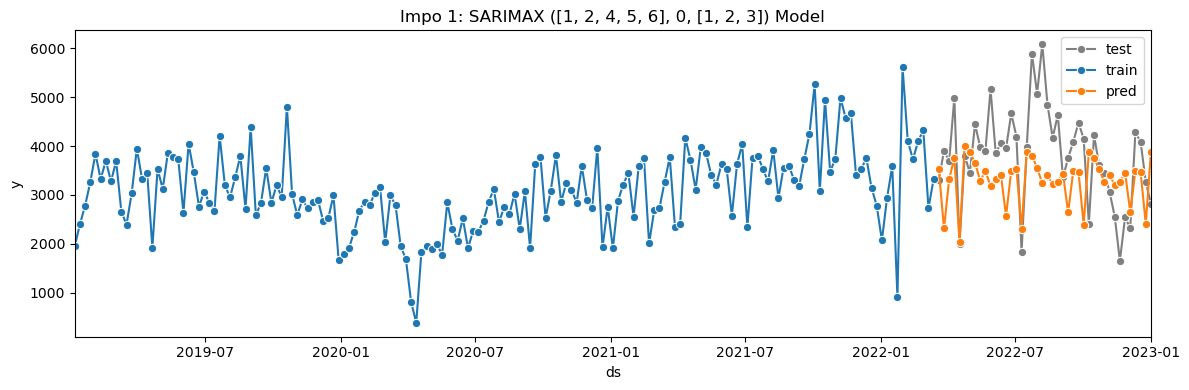

                                            SARIMAX Results                                            
Dep. Variable:                                               y   No. Observations:                  167
Model:             SARIMAX(2, 0, [3, 4, 5])x(1, 1, [1, 2], 12)   Log Likelihood               -1165.370
Date:                                         Thu, 23 Nov 2023   AIC                           2348.740
Time:                                                 10:15:12   BIC                           2376.131
Sample:                                                      0   HQIC                          2359.865
                                                         - 167                                         
Covariance Type:                                           opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1     

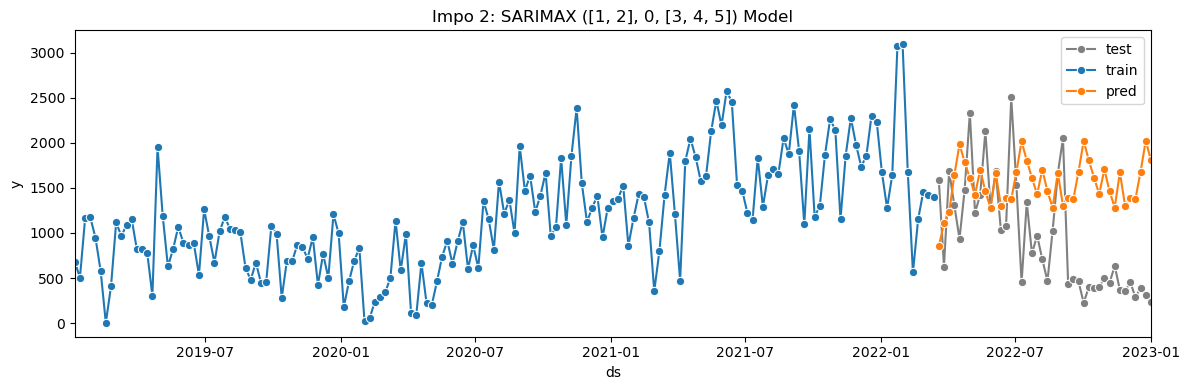

                                        SARIMAX Results                                         
Dep. Variable:                                        y   No. Observations:                  167
Model:             SARIMAX(2, 0, [5])x(2, 1, [1, 2], 9)   Log Likelihood                -897.698
Date:                                  Thu, 23 Nov 2023   AIC                           1811.396
Time:                                          10:15:16   BIC                           1835.897
Sample:                                               0   HQIC                          1821.346
                                                  - 167                                         
Covariance Type:                                    opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2105      0.074      2.828      0.005       0.065

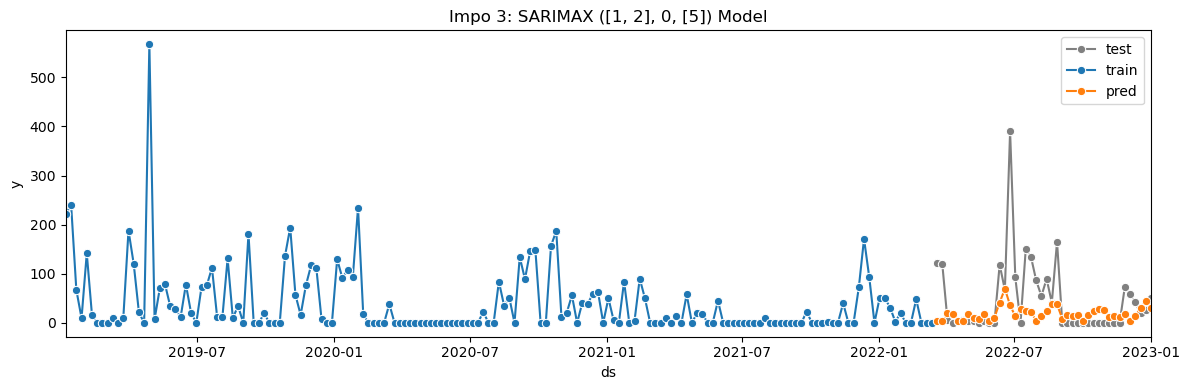

                                      SARIMAX Results                                      
Dep. Variable:                                   y   No. Observations:                  167
Model:             SARIMAX([2], 0, 1)x(1, 2, 1, 9)   Log Likelihood               -1026.036
Date:                             Thu, 23 Nov 2023   AIC                           2062.072
Time:                                     10:15:18   BIC                           2077.091
Sample:                                          0   HQIC                          2068.174
                                             - 167                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L2          0.1247      0.080      1.558      0.119      -0.032       0.282
ma.L1          0.1650      

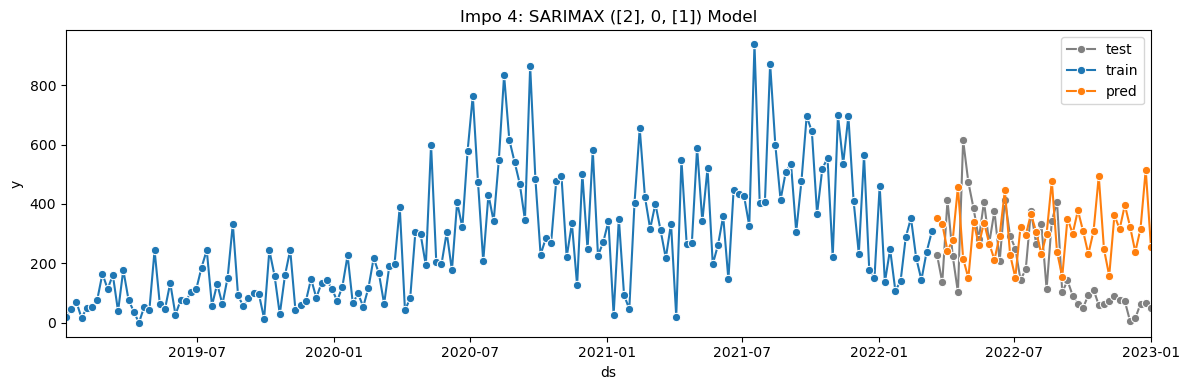

c:\Users\Bravo15\anaconda3\envs\pr_modelado2\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

c:\Users\Bravo15\anaconda3\envs\pr_modelado2\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

c:\Users\Bravo15\anaconda3\envs\pr_modelado2\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning:

Non-invertible starting seasonal moving average Using zeros as starting parameters.



                                         SARIMAX Results                                          
Dep. Variable:                                          y   No. Observations:                  167
Model:             SARIMAX([2], 0, [2])x(1, 2, [1, 2], 6)   Log Likelihood               -1164.769
Date:                                    Thu, 23 Nov 2023   AIC                           2341.538
Time:                                            10:15:22   BIC                           2359.799
Sample:                                                 0   HQIC                          2348.955
                                                    - 167                                         
Covariance Type:                                      opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L2         -1.0000    130.756     -0.008      0

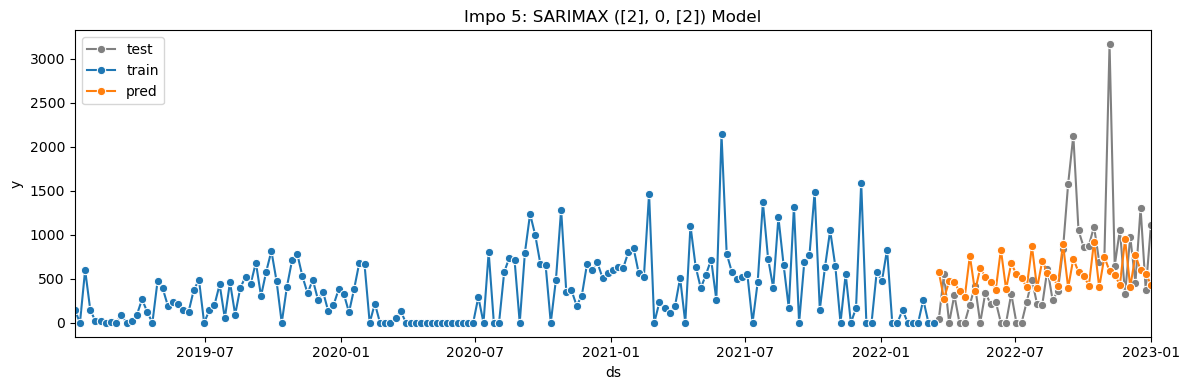

c:\Users\Bravo15\anaconda3\envs\pr_modelado2\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

c:\Users\Bravo15\anaconda3\envs\pr_modelado2\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning:

Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.

c:\Users\Bravo15\anaconda3\envs\pr_modelado2\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



                                         SARIMAX Results                                         
Dep. Variable:                                         y   No. Observations:                   28
Model:             SARIMAX(1, 0, 1)x(1, 0, [1, 2, 3], 6)   Log Likelihood                -189.900
Date:                                   Thu, 23 Nov 2023   AIC                            393.801
Time:                                           10:15:23   BIC                            403.126
Sample:                                                0   HQIC                           396.652
                                                    - 28                                         
Covariance Type:                                     opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9219      0.113      8.125      0.000    

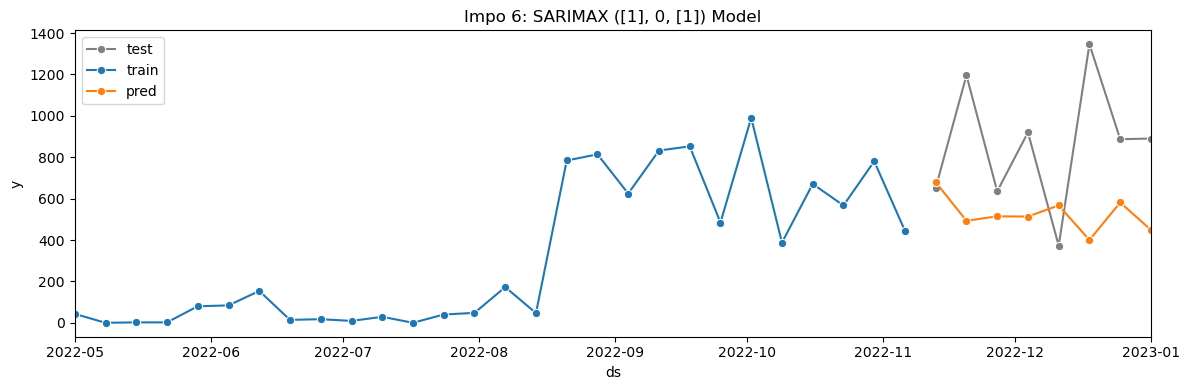

c:\Users\Bravo15\anaconda3\envs\pr_modelado2\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning:

Non-invertible starting seasonal moving average Using zeros as starting parameters.

c:\Users\Bravo15\anaconda3\envs\pr_modelado2\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



                                                     SARIMAX Results                                                      
Dep. Variable:                                                                  y   No. Observations:                  167
Model:             SARIMAX(2, 0, [10])x(1, 0, [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 4)   Log Likelihood               -1059.240
Date:                                                            Thu, 23 Nov 2023   AIC                           2148.480
Time:                                                                    10:15:37   BIC                           2195.250
Sample:                                                                         0   HQIC                          2167.463
                                                                            - 167                                         
Covariance Type:                                                              opg                                         
                

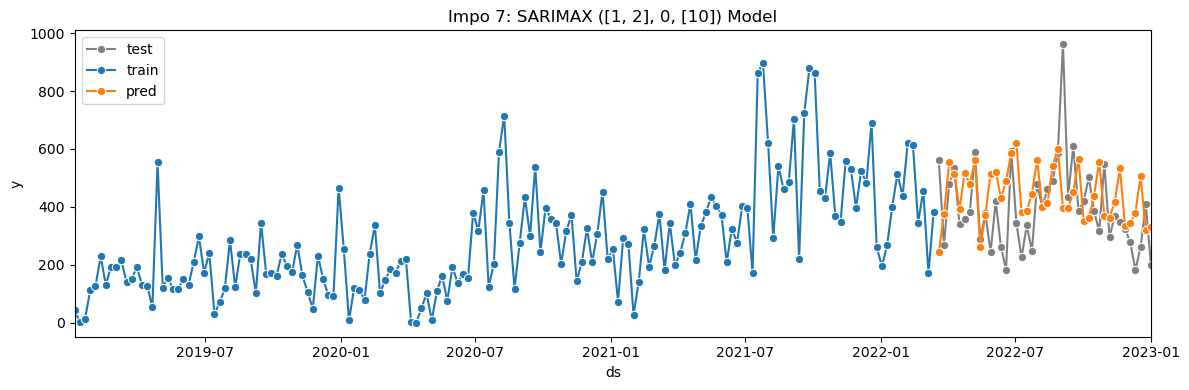

c:\Users\Bravo15\anaconda3\envs\pr_modelado2\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



                                         SARIMAX Results                                         
Dep. Variable:                                         y   No. Observations:                  167
Model:             SARIMAX([2], 0, 1)x(1, 2, [1, 2], 11)   Log Likelihood               -1310.620
Date:                                   Thu, 23 Nov 2023   AIC                           2633.239
Time:                                           10:15:43   BIC                           2651.100
Sample:                                                0   HQIC                          2640.497
                                                   - 167                                         
Covariance Type:                                     opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L2          0.1411      0.078      1.799      0.072    

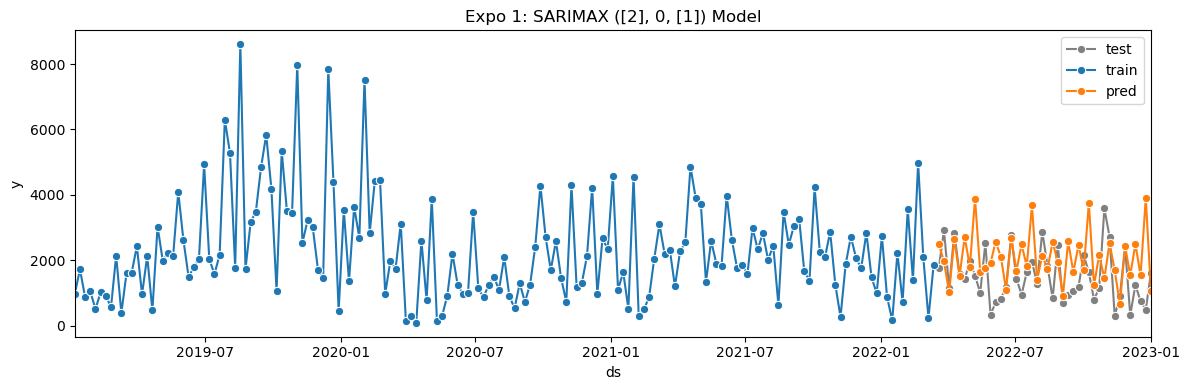

c:\Users\Bravo15\anaconda3\envs\pr_modelado2\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning:

Non-invertible starting seasonal moving average Using zeros as starting parameters.

c:\Users\Bravo15\anaconda3\envs\pr_modelado2\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



                                         SARIMAX Results                                         
Dep. Variable:                                         y   No. Observations:                  166
Model:             SARIMAX([2], 0, 1)x(1, 2, [1, 2], 11)   Log Likelihood               -1206.033
Date:                                   Thu, 23 Nov 2023   AIC                           2424.066
Time:                                           10:15:49   BIC                           2441.884
Sample:                                                0   HQIC                          2431.306
                                                   - 166                                         
Covariance Type:                                     opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L2          0.0347      0.162      0.215      0.830    

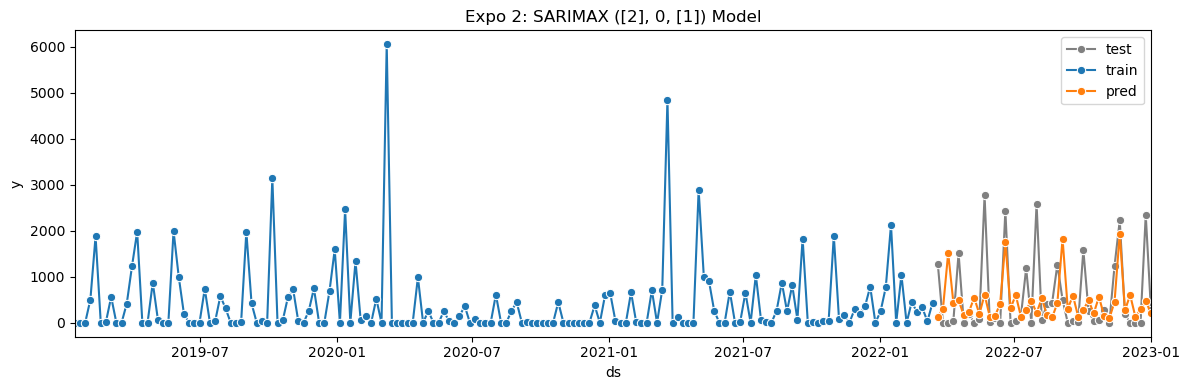

c:\Users\Bravo15\anaconda3\envs\pr_modelado2\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



                                         SARIMAX Results                                         
Dep. Variable:                                         y   No. Observations:                  164
Model:             SARIMAX([3], 0, 1)x(2, 2, [1, 2], 11)   Log Likelihood                -847.207
Date:                                   Thu, 23 Nov 2023   AIC                           1708.413
Time:                                           10:15:56   BIC                           1729.104
Sample:                                                0   HQIC                          1716.821
                                                   - 164                                         
Covariance Type:                                     opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L3          0.2031      0.089      2.273      0.023    

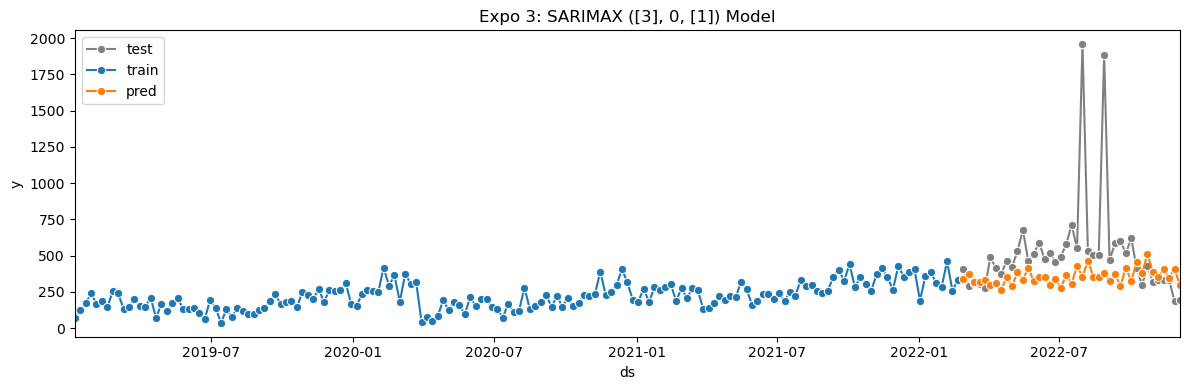

                                      SARIMAX Results                                      
Dep. Variable:                                   y   No. Observations:                  167
Model:             SARIMAX(2, 1, [2])x(1, 2, 1, 6)   Log Likelihood               -1031.086
Date:                             Thu, 23 Nov 2023   AIC                           2074.171
Time:                                     10:15:59   BIC                           2092.393
Sample:                                          0   HQIC                          2081.573
                                             - 167                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6999      4.511     -0.155      0.877      -9.541       8.141
ar.L2          0.2996      

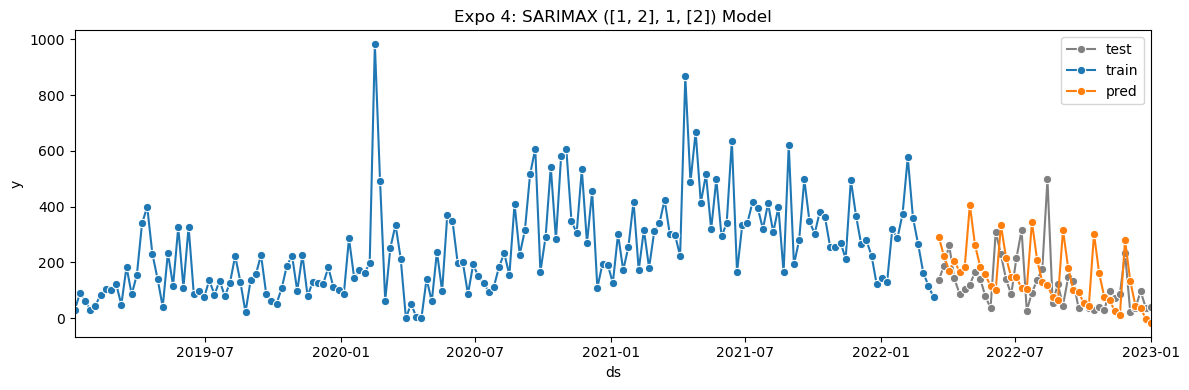

In [17]:
comparison_tbl= sarimax_model(df_impo_1, ([1,2,4,5,6],0,[1,2,3]), (1,1,1,12), 'Impo 1', comparison_tbl)
comparison_tbl= sarimax_model(df_impo_2, ([1,2],0,[3,4,5]),(1,1,2,12), 'Impo 2', comparison_tbl)
comparison_tbl= sarimax_model(df_impo_3, ([1,2],0,[5]),(2,1,2,9), 'Impo 3', comparison_tbl)
comparison_tbl= sarimax_model(df_impo_4, ([2],0,[1]),(1,2,1,9), 'Impo 4', comparison_tbl)
comparison_tbl= sarimax_model(df_impo_5, ([2],0,[2]),(1,2,2,6), 'Impo 5', comparison_tbl)
comparison_tbl= sarimax_model(df_impo_6, ([1],0,[1]),(1,0,3,6), 'Impo 6', comparison_tbl)
comparison_tbl= sarimax_model(df_impo_7, ([1,2],0,[10]),(1,0,10,4), 'Impo 7', comparison_tbl)
comparison_tbl= sarimax_model(df_expo_1, ([2],0,[1]),(1,2,2,11), 'Expo 1', comparison_tbl)
comparison_tbl= sarimax_model(df_expo_2, ([2],0,[1]),(1,2,2,11), 'Expo 2', comparison_tbl)
comparison_tbl= sarimax_model(df_expo_3, ([3],0,[1]),(2,2,2,11), 'Expo 3', comparison_tbl)
comparison_tbl= sarimax_model(df_expo_4, ([1,2],1,[2]),(1,2,1,6), 'Expo 4', comparison_tbl)

Como se puede observar en los resultados obtenidos, utilizando el modelo SARIMAX se puede obtener las variaciones para MA, AR y ARMA. De esta forma, podemos comparar las metricas y los resultados para cada serie. 

In [18]:
comparison_tbl.sort_values('RMSE')

,Serie,Modelo,MAE,RMSE,sMAPE,Processing Time
2,Impo 3,"SARIMAX ([1, 2], 0, [5])",42.912352,77.237038,1.431710,3.6856
10,Expo 4,"SARIMAX ([1, 2], 1, [2])",96.732396,137.010334,0.726832,2.8777
6,Impo 7,"SARIMAX ([1, 2], 0, [10])",141.687432,183.721246,0.342107,13.2914
3,Impo 4,"SARIMAX ([2], 0, [1])",185.779630,213.952750,0.812257,1.4397
9,Expo 3,"SARIMAX ([3], 0, [1])",199.795894,367.519378,0.367942,6.1423
5,Impo 6,"SARIMAX ([1], 0, [1])",357.309763,428.351523,0.482983,0.9007
4,Impo 5,"SARIMAX ([2], 0, [2])",413.946660,609.900753,0.859657,2.8666
1,Impo 2,"SARIMAX ([1, 2], 0, [3, 4, 5])",814.903721,916.453730,0.728610,4.6979
8,Expo 2,"SARIMAX ([2], 0, [1])",651.448471,939.710109,1.340620,5.8341
7,Expo 1,"SARIMAX ([2], 0, [1])",1081.461875,1263.594024,0.612268,5.1454


##### 2.0 Modelos Estadisticos Clasicos: 
__Conclusion:__

Los modelos estadisticos clasicos son una buena referencia de comparacion, ya que nos permiten no solo conocer patrones en la serie sino identificar lags y comportamientos propios de ellas. De esta forma, los resultados obtenidos seran utilizados en las siguientes secciones como punto de comparacion entre los distintos modelos. Es de esperar, que en las siguientes secciones con modelos de ML y Redes Neuronales logre mejorar la performance. 


Exporto el df con los resultados: 

In [19]:
comparison_tbl.to_csv('Data/Modelado/comparison_tbl.csv',index=False)